In [1]:
from timeit import default_timer as timer 
from tweepy import OAuthHandler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd 
import tweepy
import requests
import os 
import json
import re

# Gather

In [2]:
# Reading the CSV file using Pandas 

twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Downloading tweet image prediction file

url=' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(url)
with open('image-predictions.tsv', mode= 'wb')as file:
    file.write(response.content)
image_prediction_df=pd.read_csv('image-predictions.tsv', sep='\t')


In [4]:
# # Additional Data Via the Twitter API

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions


# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)


# # api = tweepy.API(auth, wait_on_rate_limit=True)
# api = tweepy.API(auth, wait_on_rate_limit= True, wait_on_rate_limit_notify= True)


# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = twitter_archive.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)


In [5]:
with open('tweet_json.txt') as file:
    additional_df= pd.read_json(file, lines= True, encoding= 'utf-8')

# Assess

In [6]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
twitter_archive['rating_numerator'].value_counts()


12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [10]:
twitter_archive['rating_denominator'].value_counts()


10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [11]:
twitter_archive['source'].value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [12]:
twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [13]:
twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [14]:
twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [15]:
twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [16]:
twitter_archive['name'].value_counts()


None          745
a              55
Charlie        12
Oliver         11
Lucy           11
             ... 
Tanner          1
Barney          1
Frönq           1
Brandonald      1
Jazzy           1
Name: name, Length: 957, dtype: int64

In [17]:
twitter_archive[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [18]:
retweets = twitter_archive.text.str.match('^(RT|rt)( @\w*)?[: ]')
twitter_archive[retweets]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
1286,708400866336894977,NaN,NaN,2016-03-11 21:15:02 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",RT if you are as ready for summer as this pup ...,NaN,NaN,NaN,https://vine.co/v/iHFqnjKVbIQ,12,10,None,None,None,None,None
1860,675489971617296384,NaN,NaN,2015-12-12 01:38:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT until we find this dog. Clearly a cool dog ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675489971...,10,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [19]:
image_prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
image_prediction_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [21]:
image_prediction_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
312,671547767500775424,https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg,2,Loafer,0.255088,False,platypus,0.090019,False,cowboy_boot,0.066536,False
1585,797545162159308800,https://pbs.twimg.com/media/CxFzFAAUAAA5C9z.jpg,1,Pembroke,0.954089,True,Cardigan,0.033644,True,papillon,0.009736,True
1533,789986466051088384,https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg,1,tub,0.479477,False,bathtub,0.325106,False,golden_retriever,0.078530,True
425,674075285688614912,https://pbs.twimg.com/media/CVrL5YBWoAA_uPD.jpg,1,Airedale,0.305392,True,Kerry_blue_terrier,0.250014,True,Lakeland_terrier,0.188668,True
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
826,693280720173801472,https://pbs.twimg.com/media/CZ8HIsGWIAA9eXX.jpg,1,Labrador_retriever,0.340008,True,bull_mastiff,0.175316,True,box_turtle,0.164337,False
295,671357843010908160,https://pbs.twimg.com/media/CVEkZaPXIAEw5vr.jpg,1,Italian_greyhound,0.831757,True,toy_terrier,0.043306,True,Chihuahua,0.036773,True
96,667724302356258817,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,1,ibex,0.619098,False,bighorn,0.125119,False,ram,0.074673,False
1685,814530161257443328,https://pbs.twimg.com/media/C03K2-VWIAAK1iV.jpg,1,miniature_poodle,0.626913,True,toy_poodle,0.265582,True,soft-coated_wheaten_terrier,0.041614,True
1655,810284430598270976,https://pbs.twimg.com/media/Cz61ZD4W8AAcJEU.jpg,1,malamute,0.620768,True,Eskimo_dog,0.158395,True,Tibetan_mastiff,0.028962,True


In [22]:
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_prediction_df['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
cheeseburger            1
lynx                    1
canoe                   1
sea_urchin              1
bookcase                1
Name: p1, Length: 378, dtype: int64

In [24]:
image_prediction_df['p1'].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [25]:
image_prediction_df['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
banded_gecko            1
chimpanzee              1
assault_rifle           1
wood_rabbit             1
Kerry_blue_terrier      1
Name: p2, Length: 405, dtype: int64

In [26]:
image_prediction_df['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
affenpinscher          1
canoe                  1
ballplayer             1
screen                 1
snail                  1
Name: p3, Length: 408, dtype: int64

In [27]:
image_prediction_df.query('p1_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [28]:
additional_df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2327,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2328,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2329,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [29]:
additional_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2331 non-null   datetime64[ns, UTC]
 1   id                             2331 non-null   int64              
 2   id_str                         2331 non-null   int64              
 3   full_text                      2331 non-null   object             
 4   truncated                      2331 non-null   bool               
 5   display_text_range             2331 non-null   object             
 6   entities                       2331 non-null   object             
 7   extended_entities              2059 non-null   object             
 8   source                         2331 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [30]:
additional_df['id_str'].head()

0    892420643555336192
1    892177421306343424
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: id_str, dtype: int64

In [31]:
additional_df['id'].head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: id, dtype: int64

In [32]:
additional_df['favorited'].head()

0    False
1    False
2    False
3    False
4    False
Name: favorited, dtype: bool

In [33]:
additional_df['favorite_count'].head()

0    35234
1    30495
2    22937
3    38516
4    36787
Name: favorite_count, dtype: int64

In [34]:
api_df=additional_df[['id', 'retweet_count','favorite_count']]

In [35]:
api_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,7430,35234
1,892177421306343426,5526,30495
2,891815181378084864,3647,22937
3,891689557279858688,7608,38516
4,891327558926688256,8191,36787


# Observations

## Quality

##### `twitter_archive` table



- the following columns have a missing values 

(in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id,
 retweeted_status_user_id,retweeted_status_timestamp, expanded_urls)
 

- tags in the source column 
 
- rating_denominator have values more than 10 

- timestamp should be datetime variable    

- some of the dogs names are not proper names 
  
- some tweets have retweets 

- ratings with decimal values incorrectly extracted
  
##### `image_prediction_df` table
- names of the columns (p1, p1_conf, p1_dog , etc ) are not clear enough and need to be renamed

- p1, p2 and p3 columns have sometimes have lowercase names and contain underscores

##### `General` 

- there are missing data between the three datasets( twitter_archive[2356]. image_prediction_df[2075], additional_df[2331])

## Tidiness

##### `twitter_archive` table

- one column that list dog stage with the appropriate stage, instead of the four columns with names of the different stages
  
 

##### `General` 
- the three datasets should be merged as they are a part of the same observational unit

# Clean

### Twitter_archive DF

In [36]:
archive_clean= twitter_archive.copy()


##### Define 
- Find all retweets and keep the tweets that are not retweets

##### Code 

In [37]:
retweets = archive_clean.text.str.match('^(RT|rt)( @\w*)?[: ]')
archive_clean = archive_clean[~retweets]

##### Test

In [38]:
retweets = archive_clean.text.str.match('^(RT|rt)( @\w*)?[: ]')
archive_clean[retweets]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### Define 
- Drop the extra columns that have a missing values 
(in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id,
 retweeted_status_user_id,retweeted_status_timestamp)

##### Code

In [39]:
archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1 , inplace=True)

##### Test

In [40]:
archive_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2173 non-null   int64 
 1   timestamp           2173 non-null   object
 2   source              2173 non-null   object
 3   text                2173 non-null   object
 4   expanded_urls       2115 non-null   object
 5   rating_numerator    2173 non-null   int64 
 6   rating_denominator  2173 non-null   int64 
 7   name                2173 non-null   object
 8   doggo               2173 non-null   object
 9   floofer             2173 non-null   object
 10  pupper              2173 non-null   object
 11  puppo               2173 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.7+ KB


##### Define
- convert timestamp to datetime variable

##### Code 

In [41]:
archive_clean['timestamp']=pd.to_datetime(archive_clean['timestamp'])

##### Test 

In [42]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2173 non-null   int64              
 1   timestamp           2173 non-null   datetime64[ns, UTC]
 2   source              2173 non-null   object             
 3   text                2173 non-null   object             
 4   expanded_urls       2115 non-null   object             
 5   rating_numerator    2173 non-null   int64              
 6   rating_denominator  2173 non-null   int64              
 7   name                2173 non-null   object             
 8   doggo               2173 non-null   object             
 9   floofer             2173 non-null   object             
 10  pupper              2173 non-null   object             
 11  puppo               2173 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

##### Define 
- Define a function to strip source link and apply to source column 


##### Code 

In [43]:
def strip_url(x):
    
    return x.split('>', 1)[-1][:-4]

archive_clean['source'] = archive_clean['source'].apply(strip_url)

##### Test 

In [44]:
archive_clean['source'].value_counts()

Twitter for iPhone     2041
Vine - Make a Scene      90
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

##### Define 
- set the rating_denominator to 10

##### Code 

In [45]:
archive_clean['rating_denominator']=archive_clean['rating_denominator']=10

##### Test 

In [46]:
archive_clean['rating_denominator'].value_counts()

10    2173
Name: rating_denominator, dtype: int64

##### Define 
- Change the rating numerator datatype to float 

##### Code

In [47]:
archive_clean['rating_numerator']= archive_clean['rating_numerator'].astype(float)

##### Test

In [48]:
archive_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                  float64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

##### Define 
- extract the correct decimal rating numerators values 

##### Code 

In [49]:
ratings = archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
archive_clean.rating_numerator = ratings


##### Test

In [50]:
archive_clean.query('rating_numerator == "13.5"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19+00:00,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10,Bella,None,None,None,None


##### Define 
- combine dog_stages into a single column


##### Code 

In [51]:
# Define a function that extract dog stage from each row 
def dog_stage(row):
    stage=[]
    if row['doggo']== 'doggo':
        stage.append('doggo')
    if row['floofer']=='floofer':
        stage.append('floofer')
    if row['pupper']=='pupper':
        stage.append('pupper')
    if row ['puppo']=='puppo':
        stage.append('puppo')
        
    if not stage:
        return'None'
    else:
        return ','.join(stage)
    
archive_clean['dog_stage']=archive_clean.apply(lambda row: dog_stage(row), axis = 1)  

In [52]:
# Drop doggo, floofer, pupper, puppo columns 
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)


##### Test

In [53]:
archive_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
876,761004547850530816,2016-08-04 01:03:17+00:00,Twitter for iPhone,This is Bo and Ty. Bo eats paper and Ty felt l...,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None
2040,671544874165002241,2015-12-01 04:22:29+00:00,Twitter for iPhone,Interesting dog here. Very large. Purple. Mani...,https://twitter.com/dog_rates/status/671544874...,6,10,None,None
954,751793661361422336,2016-07-09 15:02:31+00:00,Vine - Make a Scene,This is Fred. He's having one heck of a summer...,https://vine.co/v/5W5YHdTJvaV,11,10,Fred,None
49,882762694511734784,2017-07-06 00:46:41+00:00,Twitter for iPhone,This is Gus. He's quite the cheeky pupper. Alr...,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,pupper
77,877736472329191424,2017-06-22 03:54:17+00:00,Twitter for iPhone,This is Aja. She was just told she's a good do...,https://twitter.com/dog_rates/status/877736472...,13,10,Aja,None
725,782722598790725632,2016-10-02 23:23:04+00:00,Twitter for iPhone,This is Penny. She fought a bee and the bee wo...,https://twitter.com/dog_rates/status/782722598...,10,10,Penny,None
1296,707969809498152960,2016-03-10 16:42:10+00:00,Twitter for iPhone,Meet Rufus. He's a Honeysuckle Firefox. Curly ...,https://twitter.com/dog_rates/status/707969809...,11,10,Rufus,None
103,872486979161796608,2017-06-07 16:14:40+00:00,Twitter for iPhone,We. Only. Rate. Dogs. Do not send in other thi...,https://twitter.com/dog_rates/status/872486979...,12,10,None,None
60,880465832366813184,2017-06-29 16:39:47+00:00,Twitter for iPhone,This is Bella. She had her first beach experie...,https://twitter.com/dog_rates/status/880465832...,12,10,Bella,None
515,811386762094317568,2016-12-21 01:44:13+00:00,Twitter for iPhone,This is Craig. That's actually a normal sized ...,https://twitter.com/dog_rates/status/811386762...,11,10,Craig,pupper


In [54]:
archive_clean['dog_stage'].value_counts()

None             1829
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

##### Define 
After more assessing using query function and see the specific text related to the two dogs who had mixed dog_stage, replace them with one dog_stage

"Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable"
"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs"

##### Code 


In [55]:
archive_clean.dog_stage = archive_clean.dog_stage.replace("doggo,floofer", "floofer")

In [56]:

archive_clean.dog_stage = archive_clean.dog_stage.replace("doggo,puppo", "puppo")

##### Test 

In [57]:
archive_clean.dog_stage.value_counts()

None            1829
pupper           224
doggo             75
puppo             25
doggo,pupper      10
floofer           10
Name: dog_stage, dtype: int64

##### Define 

##### further investigation on those who are mixed doggo and pupper and change who are one to specific stage

- "817777686764523521" is pupper

- "808106460588765185" they are two dogs one is pupper named Burke and the second doggo named Dixter

- "802265048156610565" again two dogs one is pupper and the other is Doggo with no name 

- "801115127852503040" is doggo 

- "785639753186217984" is doggo 

- "781308096455073793" after getting to see the link it seems a video of two dogs one is pupper and the other is doggo

- "759793422261743616" two dogs sisters one is doggo and the other is pupper but if we took the name Maggie into account so Maggie is a doggo 

- "751583847268179968" is doggo 

- "741067306818797568" two dogs pupper and doggo 

- "733109485275860992" two dogs doggo and pupper

##### Code 

In [58]:
#change that pupper one 
archive_clean.loc[archive_clean.tweet_id == 817777686764523521, 'dog_stage']="pupper"

In [59]:
#change to doggo 
archive_clean.loc[archive_clean.tweet_id == 801115127852503040, 'dog_stage']="doggo"
archive_clean.loc[archive_clean.tweet_id == 785639753186217984, 'dog_stage']="doggo"
archive_clean.loc[archive_clean.tweet_id == 759793422261743616, 'dog_stage']="doggo"
archive_clean.loc[archive_clean.tweet_id == 751583847268179968, 'dog_stage']="doggo"

##### Test

In [60]:
archive_clean.dog_stage.value_counts()

None            1829
pupper           225
doggo             79
puppo             25
floofer           10
doggo,pupper       5
Name: dog_stage, dtype: int64

##### Define 
- change the tweet_id datatype from int to str 

##### Code 

In [61]:
archive_clean['tweet_id']= archive_clean['tweet_id'].astype(str)


##### Test 

In [62]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2173 non-null   object             
 1   timestamp           2173 non-null   datetime64[ns, UTC]
 2   source              2173 non-null   object             
 3   text                2173 non-null   object             
 4   expanded_urls       2115 non-null   object             
 5   rating_numerator    2173 non-null   object             
 6   rating_denominator  2173 non-null   int64              
 7   name                2173 non-null   object             
 8   dog_stage           2173 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(7)
memory usage: 169.8+ KB


##### Define 
- change the unproper names of the dogs to be None

##### Code 

In [63]:
mask = archive_clean.name.str.islower() 
column_name = 'name' 
archive_clean.loc[mask, column_name] = np.nan
    

##### Test 

In [64]:
archive_clean['name'].unique()


array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', nan, 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'H

In [65]:
archive_clean.name.value_counts()

None         678
Lucy          11
Charlie       11
Oliver        10
Cooper        10
            ... 
Sojourner      1
Duchess        1
Gilbert        1
Tyrus          1
Ziva           1
Name: name, Length: 931, dtype: int64

##### Define 
- dropna at expanded_urls column 

##### Code

In [66]:
archive_clean.dropna(subset=['expanded_urls'], inplace=True)

##### Test

In [67]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2115 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2115 non-null   object             
 1   timestamp           2115 non-null   datetime64[ns, UTC]
 2   source              2115 non-null   object             
 3   text                2115 non-null   object             
 4   expanded_urls       2115 non-null   object             
 5   rating_numerator    2115 non-null   object             
 6   rating_denominator  2115 non-null   int64              
 7   name                2011 non-null   object             
 8   dog_stage           2115 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(7)
memory usage: 165.2+ KB


### Api_df

In [68]:
api_clean= api_df.copy()

In [69]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


##### Define 
- Rename the id column to be "tweet_id"
- change its datatype to str

##### Code 

In [70]:
api_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

In [71]:
api_clean['tweet_id']=api_clean['tweet_id'].astype(str)


##### Test 

In [72]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   retweet_count   2331 non-null   int64 
 2   favorite_count  2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


###### Merging the api_clean with archive_clean 

In [73]:

archive_clean = pd.merge(archive_clean, api_clean, on=['tweet_id'])
                            

In [74]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 2107
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2108 non-null   object             
 1   timestamp           2108 non-null   datetime64[ns, UTC]
 2   source              2108 non-null   object             
 3   text                2108 non-null   object             
 4   expanded_urls       2108 non-null   object             
 5   rating_numerator    2108 non-null   object             
 6   rating_denominator  2108 non-null   int64              
 7   name                2004 non-null   object             
 8   dog_stage           2108 non-null   object             
 9   retweet_count       2108 non-null   int64              
 10  favorite_count      2108 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 197.6+ KB


### Image_prediction_df

In [75]:
predictions_clean=image_prediction_df.copy()

##### Define
- replace the underscore with space for the names in columns (p1, p2, p3)

##### Code 

In [76]:
predictions_clean['p1']=predictions_clean['p1'].str.replace('_',' ')
predictions_clean['p2']=predictions_clean['p2'].str.replace('_',' ')
predictions_clean['p3']=predictions_clean['p3'].str.replace('_',' ')

##### Test 

In [77]:
predictions_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
181,669328503091937280,https://pbs.twimg.com/media/CUnuuLEWEAAlKjN.jpg,1,Siberian husky,0.424202,True,Eskimo dog,0.237660,True,malamute,0.052572,True
1204,741743634094141440,https://pbs.twimg.com/media/Cksz42EW0AAh2NF.jpg,1,Labrador retriever,0.786089,True,flat-coated retriever,0.048652,True,Chesapeake Bay retriever,0.034693,True
98,667766675769573376,https://pbs.twimg.com/media/CURiQMnUAAAPT2M.jpg,1,fire engine,0.883493,False,tow truck,0.074734,False,jeep,0.012773,False
1773,828011680017821696,https://pbs.twimg.com/media/C32wOLcWYAAjNqS.jpg,1,American Staffordshire terrier,0.936662,True,Staffordshire bullterrier,0.032999,True,bull mastiff,0.017183,True
996,708349470027751425,https://pbs.twimg.com/media/CdSQFWOWAAApgfq.jpg,1,muzzle,0.243890,False,basenji,0.187158,True,Boston bull,0.092727,True
468,675109292475830276,https://pbs.twimg.com/media/CV54UQTXAAAGf-j.jpg,1,dalmatian,0.989519,True,English setter,0.005258,True,German short-haired pointer,0.001443,True
438,674422304705744896,https://pbs.twimg.com/media/CVwHgblWcAACWOD.jpg,1,golden retriever,0.964497,True,Labrador retriever,0.009006,True,tennis ball,0.007139,False
660,682406705142087680,https://pbs.twimg.com/media/CXhlRmRUMAIYoFO.jpg,1,wombat,0.709344,False,koala,0.169758,False,beaver,0.079433,False
245,670468609693655041,https://pbs.twimg.com/media/CU37pEoWUAAitje.jpg,1,minivan,0.730152,False,beach wagon,0.078661,False,car wheel,0.064346,False
1833,836753516572119041,https://pbs.twimg.com/media/C5y-4VwWcAIcaoj.jpg,1,mortarboard,0.936882,False,academic gown,0.020815,False,schipperke,0.011564,True


##### Define
- fix the names in columns p1, p2, p3 that sometimes have lowercase 

##### Code

In [78]:
predictions_clean['p1']= predictions_clean['p1'].str.title()
predictions_clean['p2']= predictions_clean['p2'].str.title()
predictions_clean['p3']= predictions_clean['p3'].str.title()

##### Test 

In [79]:
predictions_clean[['p1','p2','p3']]

,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman
...,...,...,...
2070,Basset,English Springer,German Short-Haired Pointer
2071,Paper Towel,Labrador Retriever,Spatula
2072,Chihuahua,Malamute,Kelpie
2073,Chihuahua,Pekinese,Papillon


##### Define 
- change  p1_conf, p2_conf, p3_conf values into percentages 


##### Code

In [80]:
predictions_clean['p1_conf'] = predictions_clean['p1_conf'].apply(lambda x: round(x*100, 2))
predictions_clean['p2_conf'] = predictions_clean['p2_conf'].apply(lambda x: round(x*100, 2))
predictions_clean['p3_conf'] = predictions_clean['p3_conf'].apply(lambda x: round(x*100, 2))


##### Test


In [81]:
predictions_clean[['p1_conf','p2_conf','p3_conf']]

,p1_conf,p2_conf,p3_conf
0,46.51,15.67,6.14
1,50.68,7.42,7.20
2,59.65,13.86,11.62
3,40.81,36.07,22.28
4,56.03,24.37,15.46
...,...,...,...
2070,55.57,22.58,17.52
2071,17.03,16.81,4.08
2072,71.60,7.83,3.14
2073,32.36,9.06,6.90


##### Define 

- Check the predictions_clean table for extra tweet_ids not in the archive_clean table 
- Dropping the retweeets and replies_ids from predictions_clean 

##### Code 

In [82]:
np.logical_not(predictions_clean.tweet_id.isin(list(archive_clean.tweet_id)))

0       False
1       False
2       False
3       False
4       False
        ...  
2070    False
2071    False
2072    False
2073    False
2074    False
Name: tweet_id, Length: 2075, dtype: bool

In [83]:
predictions_clean[~np.logical_not(predictions_clean.tweet_id.isin(list(archive_clean.tweet_id)))]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,46.51,True,Collie,15.67,True,Shetland Sheepdog,6.14,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,50.68,True,Miniature Pinscher,7.42,True,Rhodesian Ridgeback,7.20,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,59.65,True,Malinois,13.86,True,Bloodhound,11.62,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,40.81,True,Redbone,36.07,True,Miniature Pinscher,22.28,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,56.03,True,Rottweiler,24.37,True,Doberman,15.46,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,55.57,True,English Springer,22.58,True,German Short-Haired Pointer,17.52,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,17.03,False,Labrador Retriever,16.81,True,Spatula,4.08,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,71.60,True,Malamute,7.83,True,Kelpie,3.14,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,32.36,True,Pekinese,9.06,True,Papillon,6.90,True


##### Test

In [84]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### Define 
- Change the predictions_clean' tweet_id' datatpe to str for consistency while merging 

##### Code 

In [85]:
predictions_clean['tweet_id']=predictions_clean['tweet_id'].astype(str)


##### Test 

In [86]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


##### Define 
- Merge predictions_clean and archive_clean to be one dataset

##### Code 

In [87]:
df_clean=pd.merge(archive_clean, predictions_clean, on= 'tweet_id')
twitter_archive_master= pd.merge(archive_clean, predictions_clean, on= 'tweet_id')


##### Test 

In [88]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1986 non-null   object             
 1   timestamp           1986 non-null   datetime64[ns, UTC]
 2   source              1986 non-null   object             
 3   text                1986 non-null   object             
 4   expanded_urls       1986 non-null   object             
 5   rating_numerator    1986 non-null   object             
 6   rating_denominator  1986 non-null   int64              
 7   name                1888 non-null   object             
 8   dog_stage           1986 non-null   object             
 9   retweet_count       1986 non-null   int64              
 10  favorite_count      1986 non-null   int64              
 11  jpg_url             1986 non-null   object             
 12  img_num             1986 non-null 

In [89]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1986 non-null   object             
 1   timestamp           1986 non-null   datetime64[ns, UTC]
 2   source              1986 non-null   object             
 3   text                1986 non-null   object             
 4   expanded_urls       1986 non-null   object             
 5   rating_numerator    1986 non-null   object             
 6   rating_denominator  1986 non-null   int64              
 7   name                1888 non-null   object             
 8   dog_stage           1986 non-null   object             
 9   retweet_count       1986 non-null   int64              
 10  favorite_count      1986 non-null   int64              
 11  jpg_url             1986 non-null   object             
 12  img_num             1986 non-null 

### Here I had Two ways to deal with data combined in one dataset 
- one with normanl index and one with multi-index

#### The First way 
- Normal index

##### Define 
- Drop p2, p2_conf,p2_dog , p3,p3_conf, p3_dog

##### Code

In [90]:
twitter_archive_master.drop(columns=['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], inplace= True)

##### Test 

In [91]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1986 non-null   object             
 1   timestamp           1986 non-null   datetime64[ns, UTC]
 2   source              1986 non-null   object             
 3   text                1986 non-null   object             
 4   expanded_urls       1986 non-null   object             
 5   rating_numerator    1986 non-null   object             
 6   rating_denominator  1986 non-null   int64              
 7   name                1888 non-null   object             
 8   dog_stage           1986 non-null   object             
 9   retweet_count       1986 non-null   int64              
 10  favorite_count      1986 non-null   int64              
 11  jpg_url             1986 non-null   object             
 12  img_num             1986 non-null 

##### Define 
- Rename (p1,p1_conf,p1_dog)

##### Code 

In [92]:

twitter_archive_master.rename(columns={'p1':'dog_breed','p1_conf':'confidence_rate','p1_dog':'is_dog'}, inplace= True)

##### Test

In [93]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_breed,confidence_rate,is_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,7430,35234,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,9.70,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,5526,30495,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,32.36,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,3647,22937,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,71.60,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,7608,38516,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,17.03,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,8191,36787,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,55.57,True


#### The Second Way
- Multi_index

##### Define 
- Rename some column names 

##### Code 

In [94]:
df_clean.rename(columns={'p1_conf': 'conf1', 'p2_conf':'conf2','p3_conf':'conf3','p1_dog':'dog1','p2_dog':'dog2','p3_dog':'dog3'}, inplace=True)

##### Test

In [95]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1986 non-null   object             
 1   timestamp           1986 non-null   datetime64[ns, UTC]
 2   source              1986 non-null   object             
 3   text                1986 non-null   object             
 4   expanded_urls       1986 non-null   object             
 5   rating_numerator    1986 non-null   object             
 6   rating_denominator  1986 non-null   int64              
 7   name                1888 non-null   object             
 8   dog_stage           1986 non-null   object             
 9   retweet_count       1986 non-null   int64              
 10  favorite_count      1986 non-null   int64              
 11  jpg_url             1986 non-null   object             
 12  img_num             1986 non-null 

##### Define 
- Change the dataset from wide to long 

##### Code 

In [96]:
df_clean=pd.wide_to_long(df_clean, stubnames = ['p','conf','dog'],
                         i = ['tweet_id','timestamp','source','text','expanded_urls','rating_numerator','rating_denominator','name',
                                                                        'dog_stage','retweet_count','favorite_count','jpg_url','img_num'],
                         j = 'prediction_num')


##### Test 

In [97]:
df_clean

p  \
tweet_id           timestamp                 source             text                                               expanded_urls                                      rating_numerator rating_denominator name    dog_stage retweet_count favorite_count jpg_url                                         img_num prediction_num                           
892420643555336193 2017-08-01 16:23:56+00:00 Twitter for iPhone This is Phineas. He's a mystical boy. Only ever... https://twitter.com/dog_rates/status/8924206435... 13               10                 Phineas None      7430          35234          https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg 1       1                               Orange   
                                                                                                                                                                                                                                                                                                                 2                                Bagel   
                                                                                                                                                                                                                                                                                                                 3                               Banana   
892177421306343426 2017-08-01 00:17:27+00:00 Twitter for iPhone This is Tilly. She's just checking pup on you. ... https://twitter.com/dog_rates/status/8921774213... 13               10                 Tilly   None      5526          30495          https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg 1       1                            Chihuahua   
                                                                                                                                                                                                                                                                                                                 2                             Pekinese   
...                                                                                                                                                                                                                                                                                                                                                 ...   
666029285002620928 2015-11-15 23:05:30+00:00 Twitter for iPhone This is a western brown Mitsubishi terrier. Ups... https://twitter.com/dog_rates/status/6660292850... 7                10                 NaN     None      41            118            https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg 1       2                   Miniature Pinscher   
                                                                                                                                                                                                                                                                                                                 3                  Rhodesian Ridgeback   
666020888022790149 2015-11-15 22:32:08+00:00 Twitter for iPhone Here we have a Japanese Irish Setter. Lost eye ... https://twitter.com/dog_rates/status/6660208880... 8                10                 None    None      445           2342           https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg 1       1               Welsh Springer Spaniel   
                                                                                                                                                                                                                                                                                                                 2                               Collie   
                                                                                                                                                                                  

##### Define 
- Rename some column names 

##### Code 

In [98]:
df_clean.rename(columns={'p':'dog_breed','conf':'confidence_rate','dog':'is_dog'}, inplace=True)

##### Test 

In [99]:
df_clean.head()

dog_breed  \
tweet_id           timestamp                 source             text                                               expanded_urls                                      rating_numerator rating_denominator name    dog_stage retweet_count favorite_count jpg_url                                         img_num prediction_num              
892420643555336193 2017-08-01 16:23:56+00:00 Twitter for iPhone This is Phineas. He's a mystical boy. Only ever... https://twitter.com/dog_rates/status/8924206435... 13               10                 Phineas None      7430          35234          https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg 1       1                  Orange   
                                                                                                                                                                                                                                                                                                                 2                   Bagel   
                                                                                                                                                                                                                                                                                                                 3                  Banana   
892177421306343426 2017-08-01 00:17:27+00:00 Twitter for iPhone This is Tilly. She's just checking pup on you. ... https://twitter.com/dog_rates/status/8921774213... 13               10                 Tilly   None      5526          30495          https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg 1       1               Chihuahua   
                                                                                                                                                                                                                                                                                                                 2                Pekinese   

                                                                                                                                                                                                                                                                                                                                 confidence_rate  \
tweet_id           timestamp                 source             text                                               expanded_urls                                      rating_numerator rating_denominator name    dog_stage retweet_count favorite_count jpg_url                                         img_num prediction_num                    
892420643555336193 2017-08-01 16:23:56+00:00 Twitter for iPhone This is Phineas. He's a mystical boy. Only ever... https://twitter.com/dog_rates/status/8924206435... 13               10                 Phineas None      7430          35234          https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg 1       1                          9.70   
                                                                                                                                                                                                                                                                                                                 2                          8.59   
                                                                                                                                                                                                                                                                                                                 3                          7.61   
892177421306343426 2017-08-01 00:17:27+00:00 Twitter for iPhone This is Tilly. She's just checking pup on you. ... https://twitter.com/dog_rates/status/8921774213... 13               10                 Tilly   None      5526          30495          https://pbs.twimg.com/media/DGGmo

# Store

##### Store 
- store all the cleaned Datasets and the final dataset which is in the first line

In [100]:

twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)
df_clean.to_csv('df_clean.csv', index = False)
predictions_clean.to_csv('predicitons_clean.csv', index = False)
archive_clean.to_csv('archive_clean.csv', index = False)

# Analysis and Visualization

##### loading the data

In [101]:
df = pd.read_csv('twitter_archive_master.csv', encoding = 'utf-8')


In [102]:
df.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_breed,confidence_rate,is_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,7430,35234,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,9.70,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,5526,30495,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,32.36,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,3647,22937,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,71.60,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,7608,38516,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,17.03,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,8191,36787,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,55.57,True


Let's use descriptive statistics and visualizations to get to know the following 
- which dog stage is highly rated?
- Does the same dog stage has the same maximum count of retweet and favorite?
- which dog stage has more true prediction than false predictions?
- what is the dominant dog breed in each dog stage?

###### To answer the first question 
- It seems that puppo [dog_stage] recieves the best rating (highly rated) 

In [103]:
df.groupby(['dog_stage'])['rating_numerator'].mean().sort_values(ascending = False)


dog_stage
None            12.455985
puppo           12.043478
floofer         11.875000
doggo,pupper    11.750000
doggo           11.742424
pupper          10.648382
Name: rating_numerator, dtype: float64

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


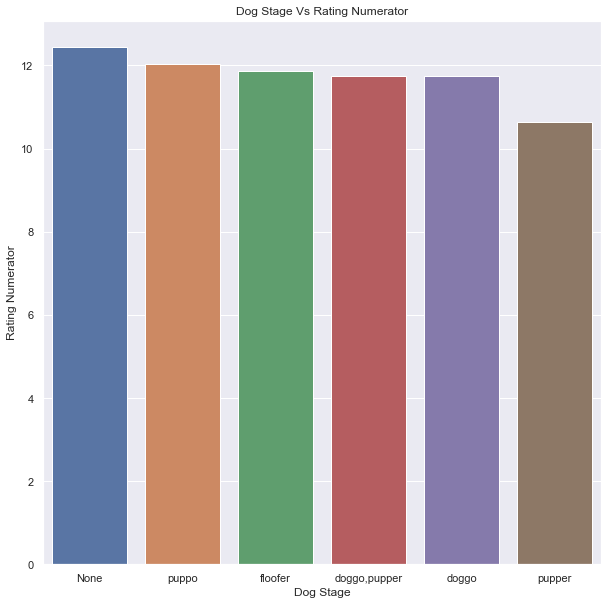

In [104]:
stage_ratings=df.groupby(['dog_stage'])['rating_numerator'].mean().sort_values(ascending = False)
x=stage_ratings.index
y=stage_ratings.values
fig, ax = plt.subplots(figsize=(10,10))
g = sns.barplot(x,y, ax=ax)
ax.set(xlabel='Dog Stage', ylabel='Rating Numerator', title='Dog Stage Vs Rating Numerator')
plt.show();


For the sake of further analysis I will depend on the four basic stages and igonre those who don't have a specific stage and thos who have 2 stages and I will focus on those who have just one stage 

To compare the four stages, I will use masks to select all the rows in the dataframe and put them in seperate dataframes 
- puppo_df   / - floofer_df      / -doggo_df      / -pupper_df

In [105]:
puppo_df= df[df['dog_stage']== 'puppo']
puppo_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_breed,confidence_rate,is_dog
12,889665388333682689,2017-07-25 01:55:32+00:00,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13.0,10,None,puppo,8809,43865,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,96.63,True
14,889531135344209921,2017-07-24 17:02:04+00:00,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13.0,10,Stuart,puppo,1988,13894,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,Golden Retriever,95.34,True
62,878776093423087618,2017-06-25 00:45:22+00:00,Twitter for iPhone,This is Snoopy. He's a proud #PrideMonthPuppo....,https://twitter.com/dog_rates/status/878776093...,13.0,10,Snoopy,puppo,3617,17753,https://pbs.twimg.com/media/DDIKMXzW0AEibje.jpg,2,Italian Greyhound,73.47,True
78,874012996292530176,2017-06-11 21:18:31+00:00,Twitter for iPhone,This is Sebastian. He can't see all the colors...,https://twitter.com/dog_rates/status/874012996...,13.0,10,Sebastian,puppo,9056,31387,https://pbs.twimg.com/media/DCEeLxjXsAAvNSM.jpg,2,Cardigan,80.67,True
104,867421006826221569,2017-05-24 16:44:18+00:00,Twitter for iPhone,This is Shikha. She just watched you drop a sk...,https://twitter.com/dog_rates/status/867421006...,12.0,10,Shikha,puppo,2244,14913,https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg,1,Eskimo Dog,61.65,True
133,859607811541651456,2017-05-03 03:17:27+00:00,Twitter for iPhone,Sorry for the lack of posts today. I came home...,https://twitter.com/dog_rates/status/859607811...,13.0,10,None,puppo,1418,17493,https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg,1,Golden Retriever,89.55,True
147,855851453814013952,2017-04-22 18:31:02+00:00,Twitter for iPhone,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13.0,10,None,puppo,16860,43446,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1,Flat-Coated Retriever,32.17,True
293,825535076884762624,2017-01-29 02:44:34+00:00,Twitter for iPhone,Here's a very loving and accepting puppo. Appe...,https://twitter.com/dog_rates/status/825535076...,14.0,10,None,puppo,17185,56001,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,1,Rottweiler,68.15,True
295,825026590719483904,2017-01-27 17:04:02+00:00,Twitter for iPhone,Say hello to Pablo. He's one gorgeous puppo. A...,https://www.gofundme.com/my-puppys-double-cata...,12.0,10,Pablo,puppo,1213,6182,https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg,2,Eskimo Dog,52.45,True
305,822872901745569793,2017-01-21 18:26:02+00:00,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13.0,10,None,puppo,42192,129490,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland Terrier,19.60,True


In [106]:
floofer_df= df[df['dog_stage']== 'floofer']
floofer_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_breed,confidence_rate,is_dog
40,883360690899218434,2017-07-07 16:22:55+00:00,Twitter for iPhone,Meet Grizzwald. He may be the floofiest floofe...,https://twitter.com/dog_rates/status/883360690...,13.0,10,Grizzwald,floofer,3241,20749,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,1,Chow,98.80,True
153,854010172552949760,2017-04-17 16:34:26+00:00,Twitter for iPhone,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11.0,10,None,floofer,2949,15471,https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg,1,English Springer,35.47,True
425,800388270626521089,2016-11-20 17:20:08+00:00,Twitter for iPhone,This is Doc. He takes time out of every day to...,https://twitter.com/dog_rates/status/800388270...,12.0,10,Doc,floofer,2779,11088,https://pbs.twimg.com/media/CxuM3oZW8AEhO5z.jpg,2,Golden Retriever,35.99,True
555,776218204058357768,2016-09-15 00:36:55+00:00,Twitter for iPhone,Atlas rolled around in some chalk and now he's...,https://twitter.com/dog_rates/status/776218204...,13.0,10,None,floofer,15497,29413,https://pbs.twimg.com/media/CsWuVEdWcAAqbe9.jpg,1,Samoyed,94.03,True
725,749317047558017024,2016-07-02 19:01:20+00:00,Twitter for iPhone,This is Blu. He's a wild bush Floofer. I wish ...,https://twitter.com/dog_rates/status/749317047...,12.0,10,Blu,floofer,2174,5358,https://pbs.twimg.com/ext_tw_video_thumb/74931...,1,Wire-Haired Fox Terrier,15.51,True
815,737445876994609152,2016-05-31 00:49:32+00:00,Twitter for iPhone,Just wanted to share this super rare Rainbow F...,https://twitter.com/dog_rates/status/737445876...,13.0,10,None,floofer,4276,9908,https://pbs.twimg.com/media/CjvvHBwUoAE55WZ.jpg,1,Samoyed,40.06,True
832,733822306246479872,2016-05-21 00:50:46+00:00,Twitter for iPhone,This is Moose. He's a Polynesian Floofer. Dapp...,https://twitter.com/dog_rates/status/733822306...,10.0,10,Moose,floofer,984,3550,https://pbs.twimg.com/media/Ci8Pfg_UUAA2m9i.jpg,1,Lhasa,45.74,True
1279,685307451701334016,2016-01-08 03:50:03+00:00,Twitter for iPhone,Say hello to Petrick. He's an Altostratus Floo...,https://twitter.com/dog_rates/status/685307451...,11.0,10,Petrick,floofer,421,2013,https://pbs.twimg.com/media/CYKzfTTWMAEeTN7.jpg,1,Pomeranian,96.32,True


In [107]:
doggo_df= df[df['dog_stage']== 'doggo']
doggo_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_breed,confidence_rate,is_dog
9,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,6432,29127,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,51.13,True
37,884162670584377345,2017-07-09 21:29:42+00:00,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12.0,10,Yogi,doggo,2636,18677,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1,German Shepherd,70.70,True
81,872967104147763200,2017-06-09 00:02:31+00:00,Twitter for iPhone,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12.0,10,None,doggo,4804,25067,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2,Labrador Retriever,47.69,True
88,871515927908634625,2017-06-04 23:56:03+00:00,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12.0,10,Napolean,doggo,3106,18618,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,2,Komondor,97.48,True
97,869596645499047938,2017-05-30 16:49:31+00:00,Twitter for iPhone,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12.0,10,Scout,doggo,2785,14782,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,1,Chihuahua,95.52,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,732375214819057664,2016-05-17 01:00:32+00:00,Twitter for iPhone,This is Kyle (pronounced 'Mitch'). He strives ...,https://twitter.com/dog_rates/status/732375214...,11.0,10,Kyle,doggo,2408,7812,https://pbs.twimg.com/media/CinrX2EWkAABDYt.jpg,1,Tennis Ball,99.87,False
863,727644517743104000,2016-05-03 23:42:26+00:00,Twitter for iPhone,Here's a doggo struggling to cope with the win...,https://twitter.com/dog_rates/status/727644517...,13.0,10,None,doggo,1677,5662,https://pbs.twimg.com/media/Chkc1BQUoAAa96R.jpg,2,Great Pyrenees,45.72,True
876,724771698126512129,2016-04-26 01:26:53+00:00,Twitter for iPhone,Nothin better than a doggo and a sunset. 11/10...,https://twitter.com/dog_rates/status/724771698...,11.0,10,None,doggo,607,2261,https://pbs.twimg.com/media/Cg7n_-OU8AA5RR1.jpg,2,German Short-Haired Pointer,83.55,True
896,719991154352222208,2016-04-12 20:50:42+00:00,Twitter for iPhone,This doggo was initially thrilled when she saw...,https://twitter.com/dog_rates/status/719991154...,10.0,10,None,doggo,1673,4669,https://pbs.twimg.com/media/Cf3sH62VAAA-LiP.jpg,2,Golden Retriever,60.53,True


In [108]:
pupper_df= df[df['dog_stage']== 'pupper']
pupper_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,dog_breed,confidence_rate,is_dog
28,886366144734445568,2017-07-15 23:25:31+00:00,Twitter for iPhone,This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12.0,10,Roscoe,pupper,2787,19315,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,1,French Bulldog,99.92,True
43,882762694511734784,2017-07-06 00:46:41+00:00,Twitter for iPhone,This is Gus. He's quite the cheeky pupper. Alr...,https://twitter.com/dog_rates/status/882762694...,12.0,10,Gus,pupper,4296,25828,https://pbs.twimg.com/media/DEAz_HHXsAA-p_z.jpg,1,Labrador Retriever,85.00,True
49,881536004380872706,2017-07-02 15:32:16+00:00,Twitter for iPhone,Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14.0,10,NaN,pupper,14117,45263,https://pbs.twimg.com/ext_tw_video_thumb/88153...,1,Samoyed,28.15,True
69,876838120628539392,2017-06-19 16:24:33+00:00,Twitter for iPhone,This is Ginger. She's having a ruff Monday. To...,https://twitter.com/dog_rates/status/876838120...,12.0,10,Ginger,pupper,2946,18993,https://pbs.twimg.com/media/DCsnnZsVwAEfkyi.jpg,1,Bloodhound,57.58,True
76,874296783580663808,2017-06-12 16:06:11+00:00,Twitter for iPhone,This is Jed. He may be the fanciest pupper in ...,https://twitter.com/dog_rates/status/874296783...,13.0,10,Jed,pupper,3664,23954,https://pbs.twimg.com/media/DCIgSR0XgAANEOY.jpg,1,Cocker Spaniel,43.72,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,672594978741354496,2015-12-04 01:55:13+00:00,Twitter for iPhone,Meet Scott. Just trying to catch his train to ...,https://twitter.com/dog_rates/status/672594978...,9.0,10,Scott,pupper,570,1248,https://pbs.twimg.com/media/CVWJkJXWsAInlZl.jpg,1,Great Pyrenees,75.59,True
1639,672481316919734272,2015-12-03 18:23:34+00:00,Twitter for iPhone,Say hello to Jazz. She should be on the cover ...,https://twitter.com/dog_rates/status/672481316...,12.0,10,Jazz,pupper,120,672,https://pbs.twimg.com/media/CVUiMUeW4AEQgkU.jpg,1,Border Collie,59.95,True
1646,672254177670729728,2015-12-03 03:21:00+00:00,Twitter for iPhone,This is Rolf. He's having the time of his life...,https://twitter.com/dog_rates/status/672254177...,11.0,10,Rolf,pupper,689,1342,https://pbs.twimg.com/media/CVRTmz1WcAA4uMF.jpg,1,Pug,97.95,True
1652,672205392827572224,2015-12-03 00:07:09+00:00,Twitter for iPhone,This is Opal. He's a Royal John Coctostan. Rea...,https://twitter.com/dog_rates/status/672205392...,9.0,10,Opal,pupper,1059,2111,https://pbs.twimg.com/media/CVQnPMrVAAAzShR.jpg,1,Carton,95.26,False


In [109]:
# Get the min and max values of retweet counts for puppo dog stage
puppo_min_twt=puppo_df.retweet_count.min()
puppo_max_twt=puppo_df.retweet_count.max()
puppo_min_twt, puppo_max_twt

(593, 42192)

In [110]:
#Get the min and max vlaues of favorite counts for puppo dog stage 
puppo_min_fav=puppo_df.favorite_count.min()
puppo_max_fav= puppo_df.favorite_count.max()
puppo_min_fav, puppo_max_fav

(2884, 129490)

In [111]:
#Get the min and max vlaues of retweet counts for floofer dog stage 
floofer_min_twt= floofer_df.retweet_count.min()
floofer_max_twt= floofer_df.retweet_count.max()

floofer_min_twt, floofer_max_twt

(421, 15497)

In [112]:
#Get the min and max vlaues of favorite counts for floofer dog stage 
floofer_min_fav=floofer_df.favorite_count.min()
floofer_max_fav= floofer_df.favorite_count.max()
floofer_min_fav, floofer_max_fav

(2013, 29413)

In [113]:
#Get the min and max vlaues of retweet counts for doggo dog stage 
doggo_min_twt= doggo_df.retweet_count.min()
doggo_max_twt= doggo_df.retweet_count.max()

doggo_min_twt, doggo_max_twt

(607, 75001)

In [114]:
#Get the min and max vlaues of favorite counts for doggo dog stage 
doggo_min_fav=doggo_df.favorite_count.min()
doggo_max_fav= doggo_df.favorite_count.max()
doggo_min_fav, doggo_max_fav

(2261, 151742)

In [115]:
#Get the min and max vlaues of retweet counts for pupper dog stage 
pupper_min_twt= pupper_df.retweet_count.min()
pupper_max_twt= pupper_df.retweet_count.max()

pupper_min_twt, pupper_max_twt

(81, 31884)

In [116]:
#Get the min and max vlaues of favorite counts for pupper dog stage 
pupper_min_fav= pupper_df.favorite_count.min()
pupper_max_fav= pupper_df.favorite_count.max()
pupper_min_fav, pupper_max_fav

(609, 113451)

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


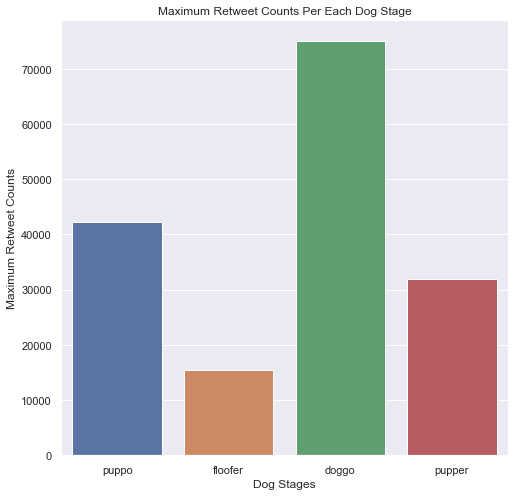

In [117]:
# Compare the maximum retweet counts for each stage 

x= ['puppo','floofer','doggo','pupper']
y= [42192,15497,75001,31884]
fig, ax=plt.subplots(figsize = (8,8))
g = sns.barplot(x,y, ax=ax)
ax.set(xlabel= "Dog Stages", ylabel="Maximum Retweet Counts" , title= "Maximum Retweet Counts Per Each Dog Stage")
plt.show()


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


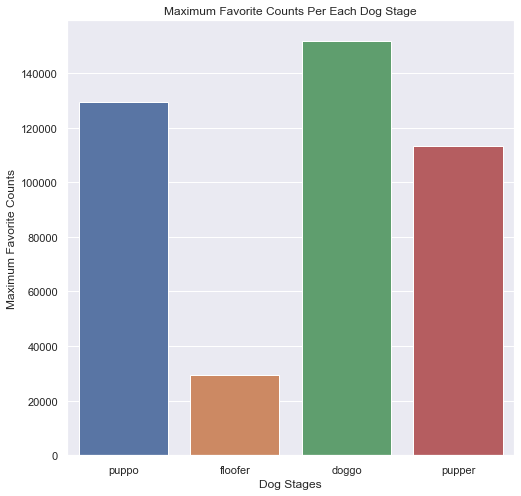

In [118]:
# Compare the maximum favorite counts for each stage 

x= ['puppo','floofer','doggo','pupper']
y= [129490,29413,151742,113451]
fig, ax=plt.subplots(figsize = (8,8))
g = sns.barplot(x,y, ax=ax)
ax.set(xlabel= "Dog Stages", ylabel="Maximum Favorite Counts" , title= "Maximum Favorite Counts Per Each Dog Stage")
plt.show()


We can notice that the " doggo " dog stage get the maximum count of retweets and favorites while others cold have higher retweet count and lower favorite count and vice versa. So we could say that Doggo stage is more likely favourable 

##### In the following we are getting to know which dog stage has more variety of dog breeds or more types of dog breeds 

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


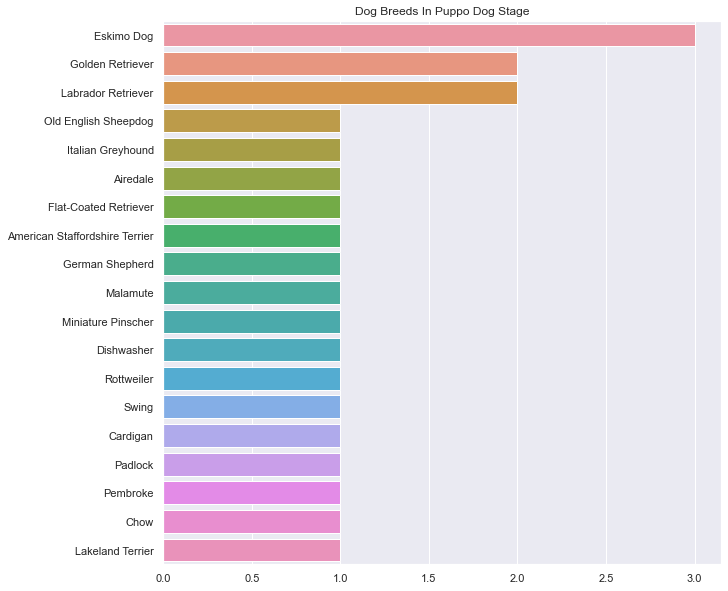

In [121]:
# puppo dog stage and number of breeds in that stage 
stage_breed= puppo_df['dog_breed'].value_counts()
x=stage_breed.values
y=stage_breed.index
fig, ax = plt.subplots(figsize=(10,10))
g = sns.barplot(x,y, ax=ax)
ax.set( title='Dog Breeds In Puppo Dog Stage')
plt.show();


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


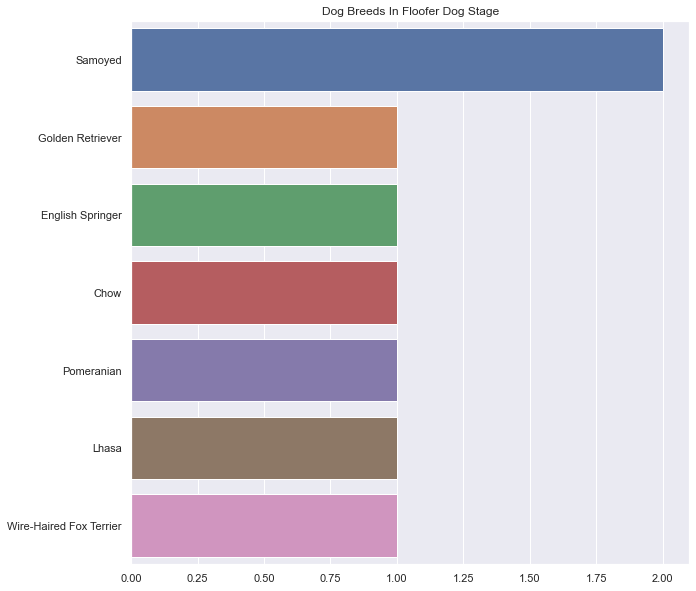

In [122]:
# floofer dog stage and number of breeds in that stage 
stage_breed= floofer_df['dog_breed'].value_counts()
x=stage_breed.values
y=stage_breed.index
fig, ax = plt.subplots(figsize=(10,10))
g = sns.barplot(x,y, ax=ax)
ax.set( title='Dog Breeds In Floofer Dog Stage')
plt.show();

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


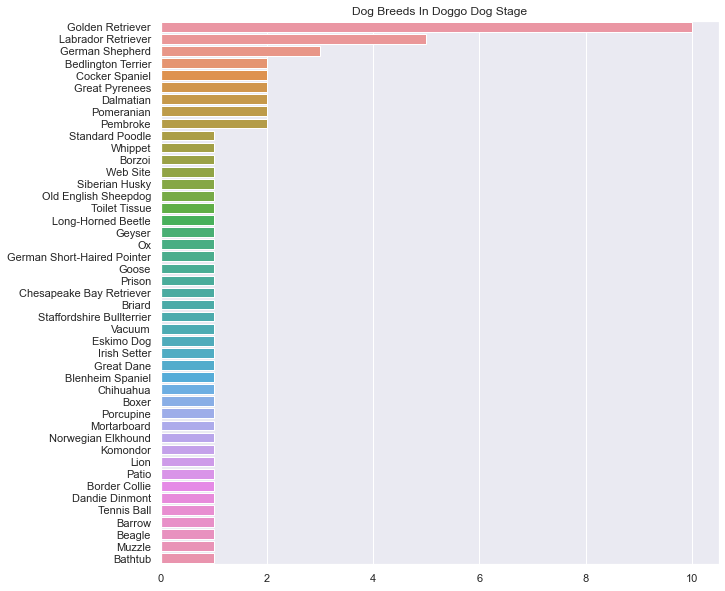

In [123]:
# doggo dog stage and number of breeds in that stage 
stage_breed= doggo_df['dog_breed'].value_counts()
x=stage_breed.values
y=stage_breed.index
fig, ax = plt.subplots(figsize=(10,10))
g = sns.barplot(x,y, ax=ax)
ax.set( title='Dog Breeds In Doggo Dog Stage')
plt.show();

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


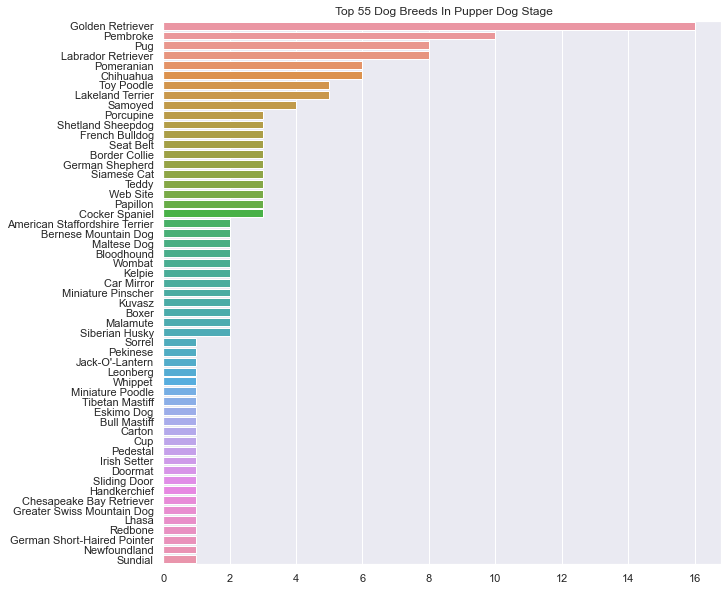

In [124]:
# pupper dog stage and number of breeds in that stage 
stage_breed=pupper_df['dog_breed'].value_counts().head(55)
x=stage_breed.values
y=stage_breed.index
fig, ax = plt.subplots(figsize=(10,10))
g = sns.barplot(x,y, ax=ax)
ax.set( title=' Top 55 Dog Breeds In Pupper Dog Stage')
plt.show();

 It seems that the pupper dog stage has more dog breeds than the other stages 

#####  In the following we get to know the dominant dog breed in each dog stage we will focus on the top 5 of each stage 

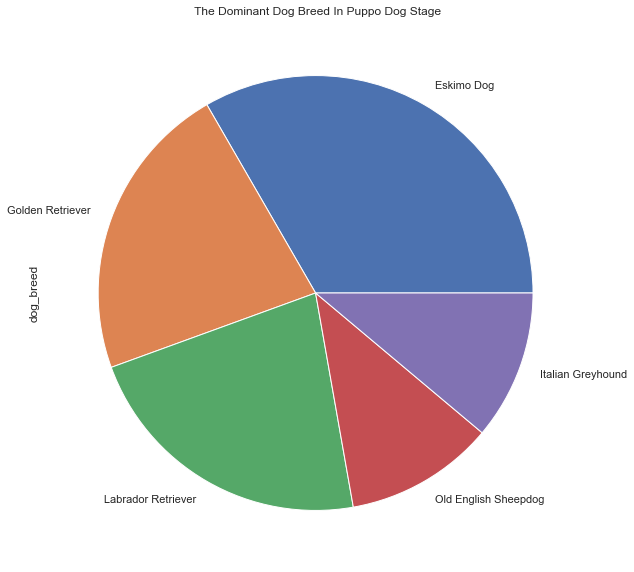

In [140]:
# the dominant breed in the puppo dog stage
puppo_df['dog_breed'].value_counts().head(5).plot(kind='pie', figsize=(10,10), title=' The Dominant Dog Breed In Puppo Dog Stage' );

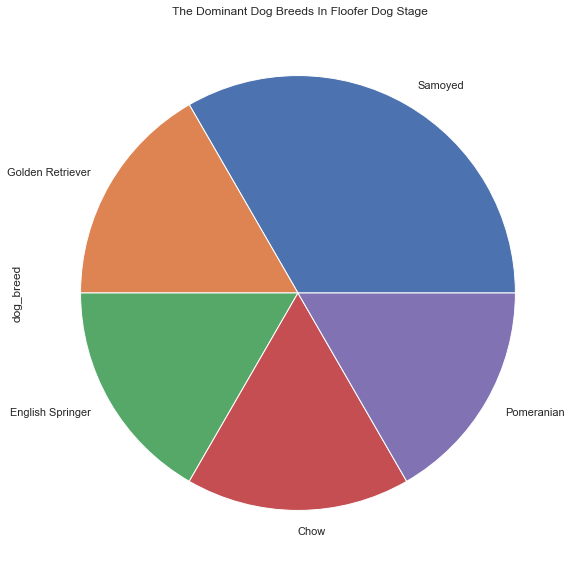

In [141]:
# the dominant breed in the floofer dog stage
floofer_df['dog_breed'].value_counts().head(5).plot(kind='pie', figsize=(10,10), title=' The Dominant Dog Breeds In Floofer Dog Stage');

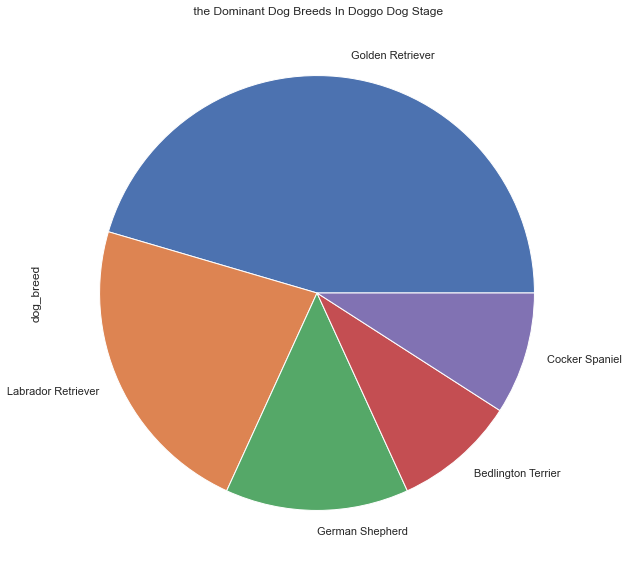

In [142]:
# the dominant breed in the doggo dog stage

doggo_df['dog_breed'].value_counts().head(5).plot(kind='pie', figsize=(10,10), title=' the Dominant Dog Breeds In Doggo Dog Stage');

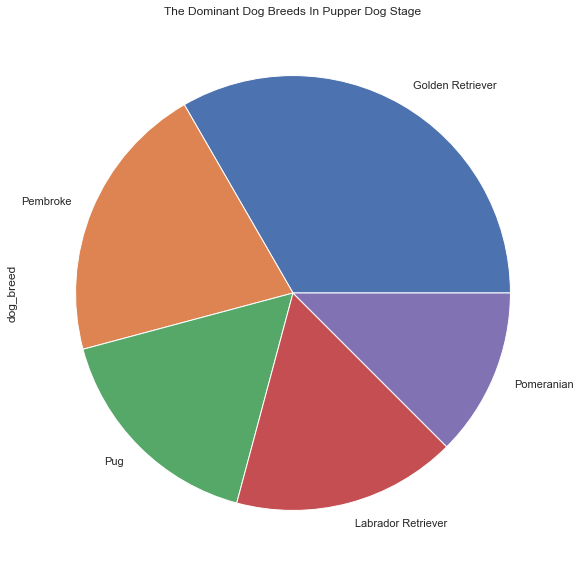

In [143]:
# the dominant breed in the pupper dog stage

pupper_df['dog_breed'].value_counts().head(5).plot(kind='pie', figsize=(10,10), title='The Dominant Dog Breeds In Pupper Dog Stage');

We can say that the "Golden Retriever" is the dominant breed since it is the dominant in pupper and doggo stages while it comes at the top 3 in the others stages 

##### To answer the question "which dog stage has more true prediction than false predictions?" 
 we will select specific columns and use two masks to respresent the correct and false predictions

In [144]:
# to get the two columns and use correct mask to use the true predictions
sub_df= df[['is_dog', 'dog_stage']]
correct= sub_df.query('is_dog == True')


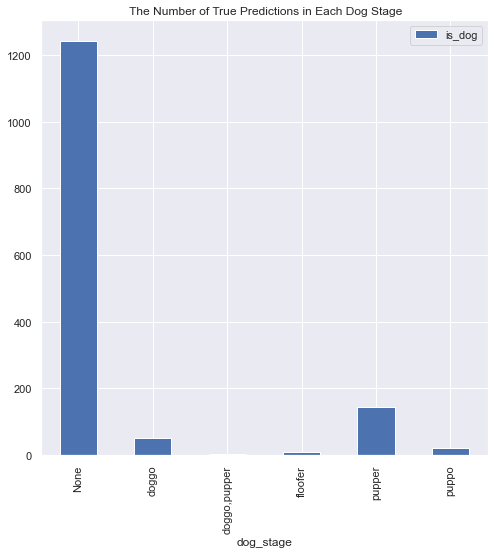

In [145]:
# get the count of each dog stage in relation to the true predictions 
correct.groupby('dog_stage').count().plot(kind='bar', figsize=(8,8), title=' The Number of True Predictions in Each Dog Stage');


In [146]:
# to get the two columns and use false mask to use the false predictions
sub_df= df[['is_dog', 'dog_stage']]
false= sub_df.query('is_dog == False')


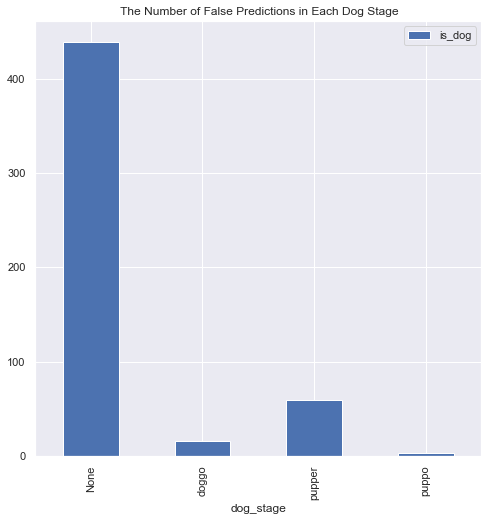

In [147]:
# get the count of each dog stage in relation to the false predictions 
 
false.groupby('dog_stage').count().plot(kind='bar', figsize=(8,8), title=' The Number of False Predictions in Each Dog Stage');

It seems that they all get higher values regarding true predictions than false predictions but for the floofer dog stage it does not appear at all in the false predictions